In [5]:
#workhorses
import numpy as np
import pandas as pd


#plotting things

#%matplotlib qt5 -- I don't know what this is
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from cycler import cycler

In [6]:
#plotting things

#%matplotlib qt5 -- I don't know what this is
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from cycler import cycler


#All of Anandh's customized seaborn/matplotlib settings

sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

#%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')

    #If you want to use a different font
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 
#                  'serif': ['Helvetica']})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(9,8))

## get data

In [9]:
directory = 'Z:/Reed/Projects/micro_consortia/DARPA_biocon/Task 1.1/A=B/20181128 A=B cfp yfp screen 1/'

filename = '20181128 cfp yfp A=B screen 1.xlsx'

In [10]:
data_dict = pd.read_excel(directory + filename, sheet_name=None)

In [11]:
data_dict.keys()

odict_keys(['OD700', 'CFP61', 'CFP100', 'YFP61', 'YFP100', 'Exp', 'IDs', 'OD700_final_tidy', 'CFP61_tidy', 'CFP100_tidy', 'YFP61_tidy', 'YFP100_tidy'])

## create data you want to plot

In [12]:
sheets_to_plot = [x for x in data_dict.keys() if '_tidy' in x]

In [27]:
ot, c61, c100, y61, y100 = [data_dict[sheet] for sheet in sheets_to_plot]

## plot data

In [19]:
#select only the rows where the A cell is number 6-1
idx = ot['a'] == 52
#select only the rows where the ratio between A and B is known and defined (e.g. not 0 or inf)
idx2 = ~ot['ba ratio'].isin(['n', 'x'])
#select only B cell 1-1
idx3 = ot['b'] == 21
#make the union of these indices to slice the data
big_idx = idx & idx3

In [20]:
sli = ot.loc[big_idx, :]

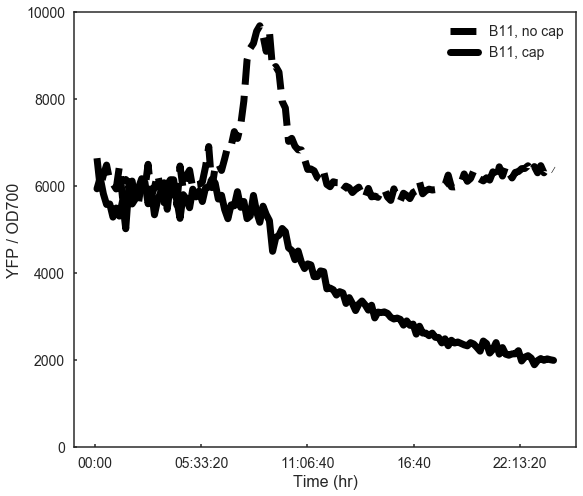

In [49]:
#show the uncapped YFP/OD for B1-1
plt.plot(data_dict['OD700']['Time'], (data_dict['YFP']['B5'] / data_dict['OD700']['B5']), 'k--',linewidth=7)

#show the capped YFP/OD for B1-1
plt.plot(data_dict['OD700']['Time'], (data_dict['YFP']['A5'] / data_dict['OD700']['A5']), 'k', linewidth=7)

#show the induced YFP/OD for all different A's with B1-1
for well, col in zip(['A9', 'A10', 'A11', 'A12'], ['b','g','y','m']):
    plt.plot(data_dict['OD700']['Time'], (data_dict['YFP'][well] / data_dict['OD700'][well]), color=col, linewidth=3)
    
#show the uninduced YFP/OD for all different A's with B1-1
for well, col in zip(['B9', 'B10', 'B11', 'B12'], ['b','g','y','m']):
    plt.plot(data_dict['OD700']['Time'], (data_dict['YFP'][well] / data_dict['OD700'][well]), '--', color=col, linewidth=3)

plt.ylim([0, 10000])

labels = ['B11, no cap', 'B11, cap', 'B11 + A51', 'B11 + A52', 'B11 + A61', 'B11 + A81']

plt.legend(labels)

plt.xlabel('Time (hr)')
plt.ylabel('YFP / OD700')

#plt.savefig('../Local Data/B11_cap-nocap.pdf')

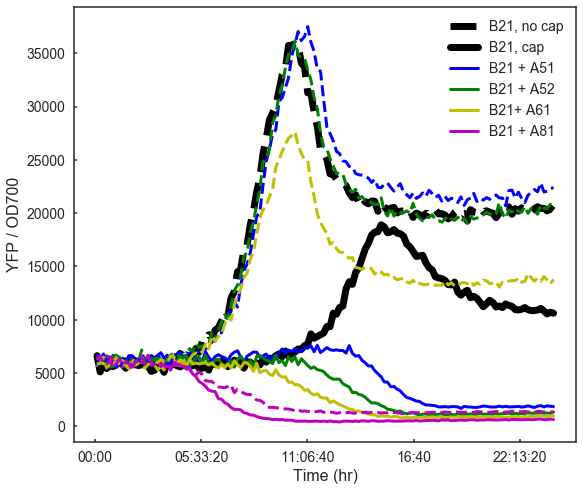

In [54]:
#show the uncapped YFP/OD for B2-1
plt.plot(data_dict['OD700']['Time'], (data_dict['YFP']['B6'] / data_dict['OD700']['B6']), 'k--',linewidth=7)

#show the capped YFP/OD for B2-1
plt.plot(data_dict['OD700']['Time'], (data_dict['YFP']['A6'] / data_dict['OD700']['A6']), 'k', linewidth=7)

#show the induced YFP/OD for all different A's with B2-1
for well, col in zip(['C1', 'C2', 'C3', 'C4'], ['b','g','y','m']):
    plt.plot(data_dict['OD700']['Time'], (data_dict['YFP'][well] / data_dict['OD700'][well]), color=col, linewidth=3)
    
#show the uninduced YFP/OD for all different A's with B1-1
for well, col in zip(['D1', 'D2', 'D3', 'D4'], ['b','g','y','m']):
    plt.plot(data_dict['OD700']['Time'], (data_dict['YFP'][well] / data_dict['OD700'][well]), '--', color=col, linewidth=3)

#plt.ylim([0, 10000])

labels = ['B21, no cap', 'B21, cap', 'B21 + A51', 'B21 + A52', 'B21+ A61', 'B21 + A81']

plt.legend(labels)

plt.xlabel('Time (hr)')
plt.ylabel('YFP / OD700')

#plt.savefig('../Local Data/B21+As_yfp-od.pdf')

## Generate a facetgrid for all the wells showing just OD

In [38]:
def fix_title (axes_obj):
    
    title_str = axes_obj.title.get_text()
    
    new_title = 'A' + title_str[0] + ' + ' + 'B' + title_str[1:]
    
    return new_title

In [33]:
#create a column I can use facetgrid to hue on
ot = ot.assign(ab_id = ot['a'].astype(str) + ot['b'].astype(str))

In [34]:
#remove the non mixed singe cell populations
idx1 = ot['ab seed ratio vol'] != 'n'

#exclude the final half induced wells
idx2 = ~((ot['atc'] == 0) & (ot['iptg'] == 1))

#composite index

i = idx1 #& idx2

In [35]:
ot.loc[i].head()

,Time,Temp C,well,value,a,b,iptg,atc,ab seed ratio vol,ab_id
130,0.261389,37.0,A10,0.078,1,42,0,0,0.5,142
131,0.594722,37.1,A10,0.078,1,42,0,0,0.5,142
132,0.928056,37.0,A10,0.078,1,42,0,0,0.5,142
133,1.261389,37.0,A10,0.078,1,42,0,0,0.5,142
134,1.594722,36.9,A10,0.078,1,42,0,0,0.5,142


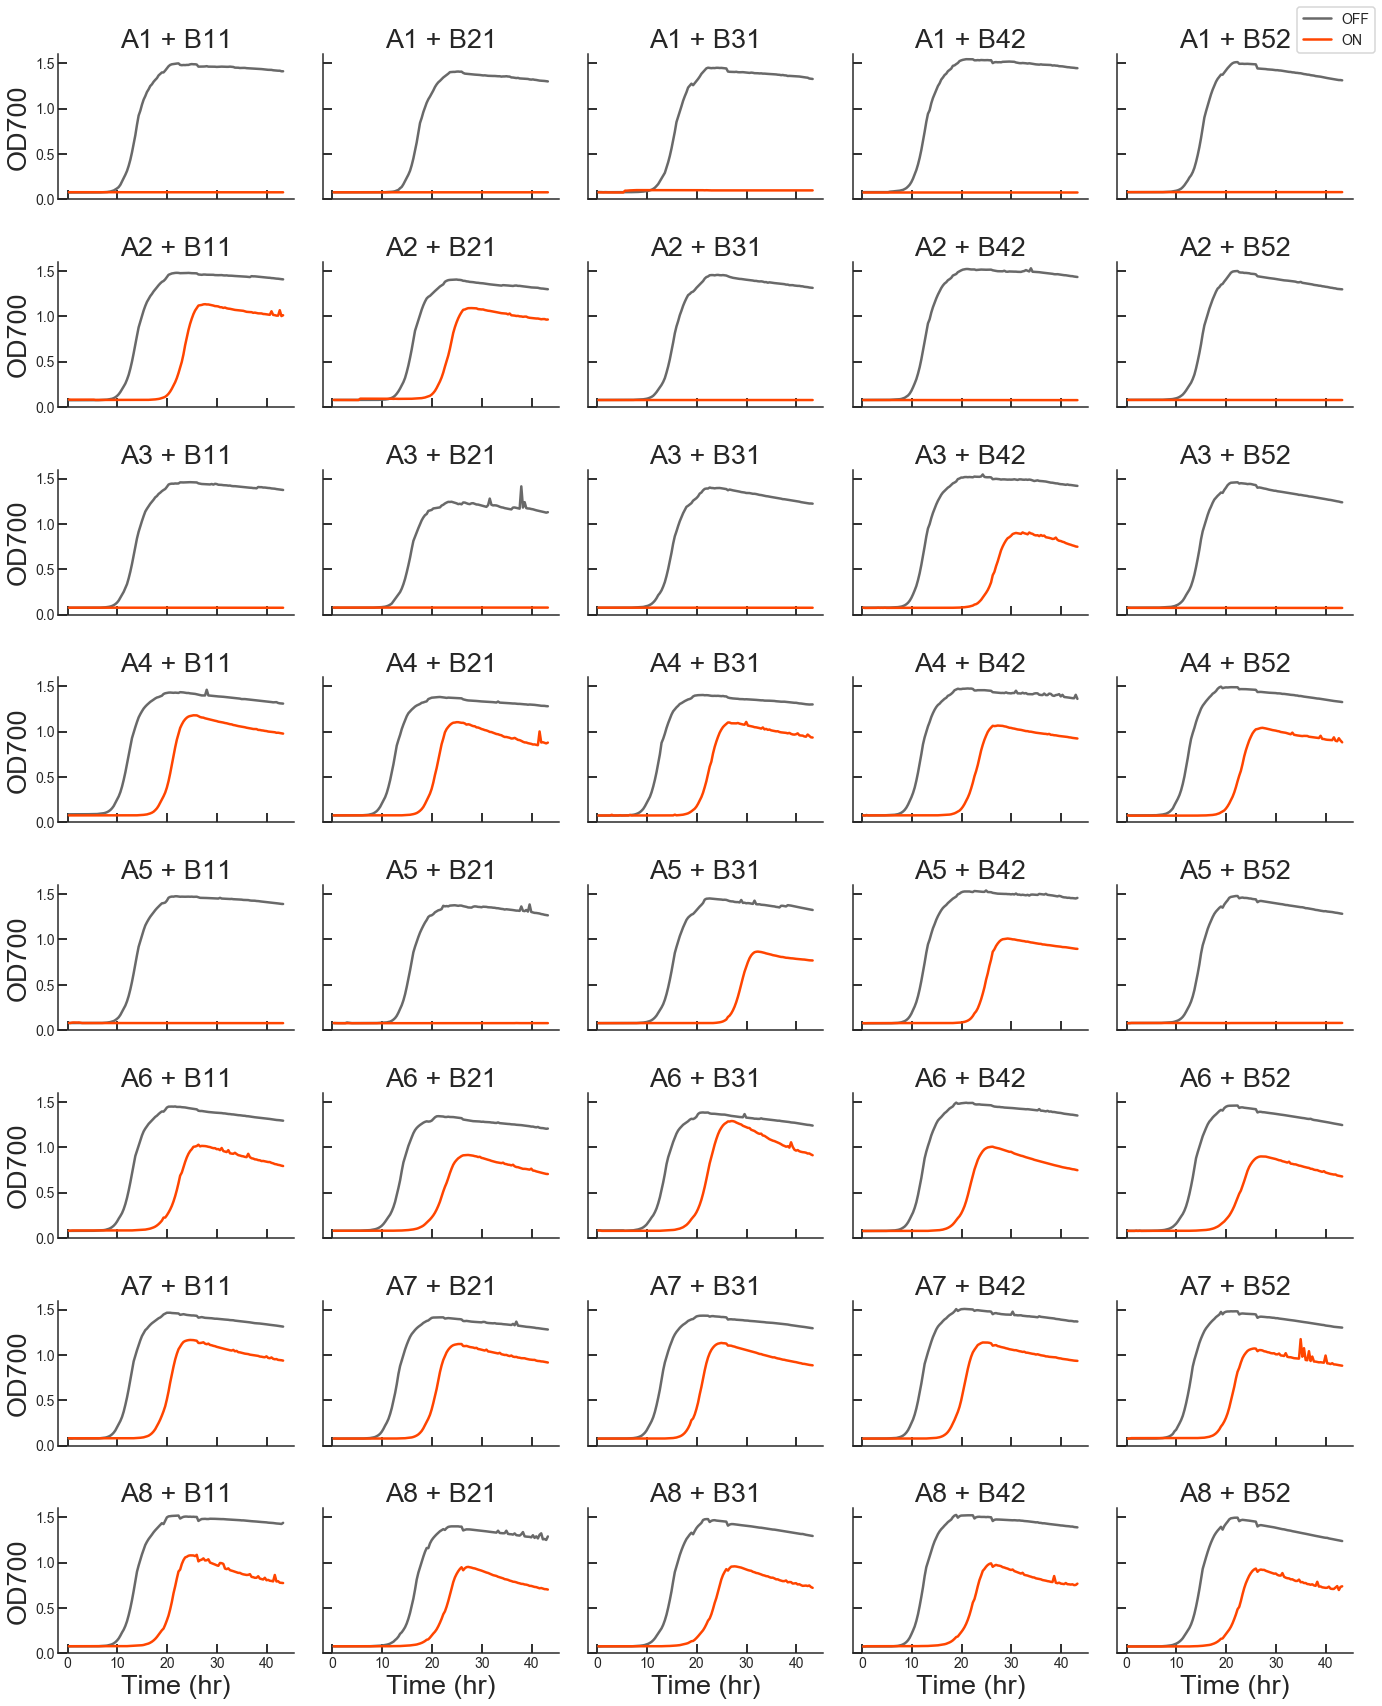

In [62]:
pal = {0 : "dimgray", 1 : 'orangered'}

g = sns.FacetGrid(ot.loc[i], col="ab_id", hue='iptg', palette=pal,
                  col_wrap=5, height=3, aspect=1.3, ylim=(0,1.6), margin_titles=True, legend_out=True)


g.map(plt.plot, "Time", "value", linewidth=2.5)

g.fig.legend(labels=['OFF', 'ON'])

g.set_titles("{col_name}")
g.set_axis_labels('Time (hr)', "OD700")

#fix the titles
axes = g.axes.flatten()

for ax in axes:
    ax.title.set_text(fix_title(ax))

In [44]:
g.savefig(directory + 'allABcombos_on')